Data Preparation

In [1]:
#Installing required libraries 
%pip install numpy
%pip install pandas
%pip install mlxtend
%pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
#import required libraries and modules
import numpy as np
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#for city A's POI data
poi_data_city_A = pd.read_csv('/Users/sallykim/Desktop/SC4020 Project/POIdata_cityA.csv')

#for city B's POI data
poi_data_city_B = pd.read_csv('/Users/sallykim/Desktop/SC4020 Project/POIdata_cityB.csv')

#for city C's POI data
poi_data_city_C = pd.read_csv('/Users/sallykim/Desktop/SC4020 Project/POIdata_cityC.csv')

#for city D's POI data
poi_data_city_D = pd.read_csv('/Users/sallykim/Desktop/SC4020 Project/POIdata_cityD.csv')

#Load the POI categories data
poi_categories = pd.read_csv('/Users/sallykim/Desktop/SC4020 Project/POI_datacategories.csv', header=None)
#need to put header=None because no header

In [3]:
#Add category IDs for merging needed later
poi_categories['category'] = range(1, len(poi_categories)+1)
poi_categories.columns = ['description', 'category']
poi_categories.to_csv("POI_datacategories_with_ids.csv")

poi_categories

,description,category
0,Food,1
1,Shopping,2
2,Entertainment,3
3,Japanese restaurant,4
4,Western restaurant,5
...,...,...
80,Heavy Industry,81
81,NPO,82
82,Utility Copany,83
83,Port,84


In [4]:
#Merging data with POI categories to identify the categories with their descriptions
merged_data_city_A = pd.merge(poi_data_city_A, poi_categories, on='category')
merged_data_city_B = pd.merge(poi_data_city_B, poi_categories, on='category')
merged_data_city_C = pd.merge(poi_data_city_C, poi_categories, on='category')
merged_data_city_D = pd.merge(poi_data_city_D, poi_categories, on='category')

In [5]:
#Grouping data by x,y coordinates and create baskets {Category:Quantity}
basket_data_city_A = merged_data_city_A.groupby(['x','y']).apply(
    lambda group: {row['description']: row['POI_count'] for _, row in group.iterrows()}
    ).reset_index(name='basket')

basket_data_city_B = merged_data_city_B.groupby(['x','y']).apply(
    lambda group: {row['description']: row['POI_count'] for _, row in group.iterrows()}
    ).reset_index(name='basket')

basket_data_city_C = merged_data_city_C.groupby(['x','y']).apply(
    lambda group: {row['description']: row['POI_count'] for _, row in group.iterrows()}
    ).reset_index(name='basket')

basket_data_city_D = merged_data_city_D.groupby(['x','y']).apply(
    lambda group: {row['description']: row['POI_count'] for _, row in group.iterrows()}
    ).reset_index(name='basket')


/var/folders/h0/rhbcsgc117x4579hxtjrq1vc0000gn/T/ipykernel_5001/2713439397.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  basket_data_city_A = merged_data_city_A.groupby(['x','y']).apply(
/var/folders/h0/rhbcsgc117x4579hxtjrq1vc0000gn/T/ipykernel_5001/2713439397.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  basket_data_city_B = merged_data_city_B.groupby(['x','y']).apply(
/var/folders/h0/rhbcsgc1

In [6]:
basket_data_city_A

,x,y,basket
0,1,1,"{'Church': 4, 'Transit Station': 4, 'Building ..."
1,1,2,"{'Post Office': 2, 'Gardening': 1, 'Transit St..."
2,1,3,"{'Church': 4, 'Heavy Industry': 2, 'Transit St..."
3,1,4,"{'Community Center': 3, 'Heavy Industry': 2, '..."
4,1,5,"{'Church': 2, 'Home Appliances': 1, 'Transit S..."
...,...,...,...
20141,200,196,"{'Interior Shop': 1, 'Transit Station': 1, 'Ha..."
20142,200,197,"{'Japanese restaurant': 1, 'Port': 1, 'Bank': ..."
20143,200,198,"{'Heavy Industry': 4, 'Post Office': 2, 'Trans..."
20144,200,199,"{'Kindergarten': 3, 'Western restaurant': 2, '..."


In [7]:
basket_data_city_B

,x,y,basket
0,1,1,"{'Building Material': 2, 'Port': 1}"
1,1,2,{'NPO': 1}
2,1,3,"{'Elderly Care Home': 1, 'Church': 1}"
3,1,6,"{'Kindergarten': 1, 'Church': 1}"
4,1,7,"{'Post Office': 2, 'Community Center': 1, 'Sch..."
...,...,...,...
9119,200,143,"{'Community Center': 2, 'Laundry ': 2, 'Bakery..."
9120,200,144,"{'Church': 7, 'Heavy Industry': 3, 'Hair Salon..."
9121,200,150,{'Church': 1}
9122,200,195,{'Church': 1}


In [8]:
basket_data_city_C

,x,y,basket
0,1,35,{'Transit Station': 1}
1,1,38,{'Transit Station': 1}
2,1,45,"{'Transit Station': 1, 'Park': 1}"
3,1,108,{'Hotel': 1}
4,1,128,"{'Church': 1, 'Swimming Pool': 1}"
...,...,...,...
3246,187,199,"{'Home Appliances': 1, 'Convenience Store': 1,..."
3247,187,200,"{'Community Center': 1, 'Grocery Store': 1, 'H..."
3248,188,199,{'Driving School': 1}
3249,188,200,{'Community Center': 1}


In [9]:
basket_data_city_D

,x,y,basket
0,1,11,{'Hotel': 1}
1,1,55,"{'Home Appliances': 2, 'Transit Station': 1}"
2,1,56,"{'Hot Spring': 1, 'Retail Store': 1, 'Grocery ..."
3,1,57,"{'Hair Salon': 3, 'Grocery Store': 3, 'Kinderg..."
4,1,58,"{'Hair Salon': 3, 'Church': 2, 'Grocery Store'..."
...,...,...,...
10983,200,181,"{'Church': 1, 'Home Appliances': 1, 'Community..."
10984,200,188,"{'Home Appliances': 1, 'Transit Station': 1, '..."
10985,200,189,{'Community Center': 1}
10986,200,192,"{'Transit Station': 3, 'Hair Salon': 2, 'Hospi..."


https://codinginfinite.com/implement-apriori-algorithm-in-python/#google_vignette  - below codes all referenced from this site

**One-Hot Encoding data before Apriori algorithm**

In [10]:
#need data that ignores quantity (category POI counts)
basket_data_city_A['basket'] = basket_data_city_A['basket'].apply(lambda x: list(x.keys()))
basket_data_city_B['basket'] = basket_data_city_B['basket'].apply(lambda x: list(x.keys()))
basket_data_city_C['basket'] = basket_data_city_C['basket'].apply(lambda x: list(x.keys()))
basket_data_city_D['basket'] = basket_data_city_D['basket'].apply(lambda x: list(x.keys()))


In [11]:
#Now use the TransactionEncoder object to array format suitable for typical aprori algorithm
from mlxtend.preprocessing import TransactionEncoder

transactions_city_A = basket_data_city_A['basket'].tolist()
transactions_city_B = basket_data_city_B['basket'].tolist()
transactions_city_C = basket_data_city_C['basket'].tolist()
transactions_city_D = basket_data_city_D['basket'].tolist()

#combine all transaction from each city to ensure consistency in POI categories
all_transactions = transactions_city_A + transactions_city_B + transactions_city_C + transactions_city_D

# Use TransactionEncoder to perform one-hot encoding
TE = TransactionEncoder()
TE.fit(all_transactions)

TE_ary_A = TE.transform(transactions_city_A).astype("int")
TE_ary_B = TE.transform(transactions_city_B).astype("int")
TE_ary_C = TE.transform(transactions_city_C).astype("int")
TE_ary_D = TE.transform(transactions_city_D).astype("int")

basket_df_A = pd.DataFrame(TE_ary_A, columns=TE.columns_)
basket_df_B = pd.DataFrame(TE_ary_B, columns=TE.columns_)
basket_df_C = pd.DataFrame(TE_ary_C, columns=TE.columns_)
basket_df_D = pd.DataFrame(TE_ary_D, columns=TE.columns_)

Generating Frequent Itemsets Using apriori() function

In [12]:
#For City A
freqitem_A_2 = apriori(basket_df_A, min_support=0.2, use_colnames=True, max_len=85, verbose=0, low_memory=False)
freqitem_A_3 = apriori(basket_df_A, min_support=0.3, use_colnames=True, max_len=85, verbose=0, low_memory=False)
freqitem_A_4 = apriori(basket_df_A, min_support=0.4, use_colnames=True, max_len=85, verbose=0, low_memory=False)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [13]:
print("The frequent itemsets with min support 0.2 are:")
print(freqitem_A_2)
print()

print("The frequent itemsets with min support 0.3 are:")
print(freqitem_A_3)
print()

print("The frequent itemsets with min support 0.4 are:")
print(freqitem_A_4)

The frequent itemsets with min support 0.2 are:
     support                                           itemsets
0   0.332324                                (Accountant Office)
1   0.251861                                             (Bank)
2   0.453291                                (Building Material)
3   0.255932                                             (Café)
4   0.220540                                     (Chiropractic)
..       ...                                                ...
77  0.218207  (Home Appliances, Building Material, Real Estate)
78  0.216271      (Home Appliances, Hair Salon, Heavy Industry)
79  0.219746          (Hair Salon, Real Estate, Heavy Industry)
80  0.209421         (Home Appliances, Hair Salon, Real Estate)
81  0.223419     (Home Appliances, Real Estate, Heavy Industry)

[82 rows x 2 columns]

The frequent itemsets with min support 0.3 are:
     support                              itemsets
0   0.332324                   (Accountant Office)
1   0.4532

Visualizing the itemsets with a co-occurence matrix for city A data

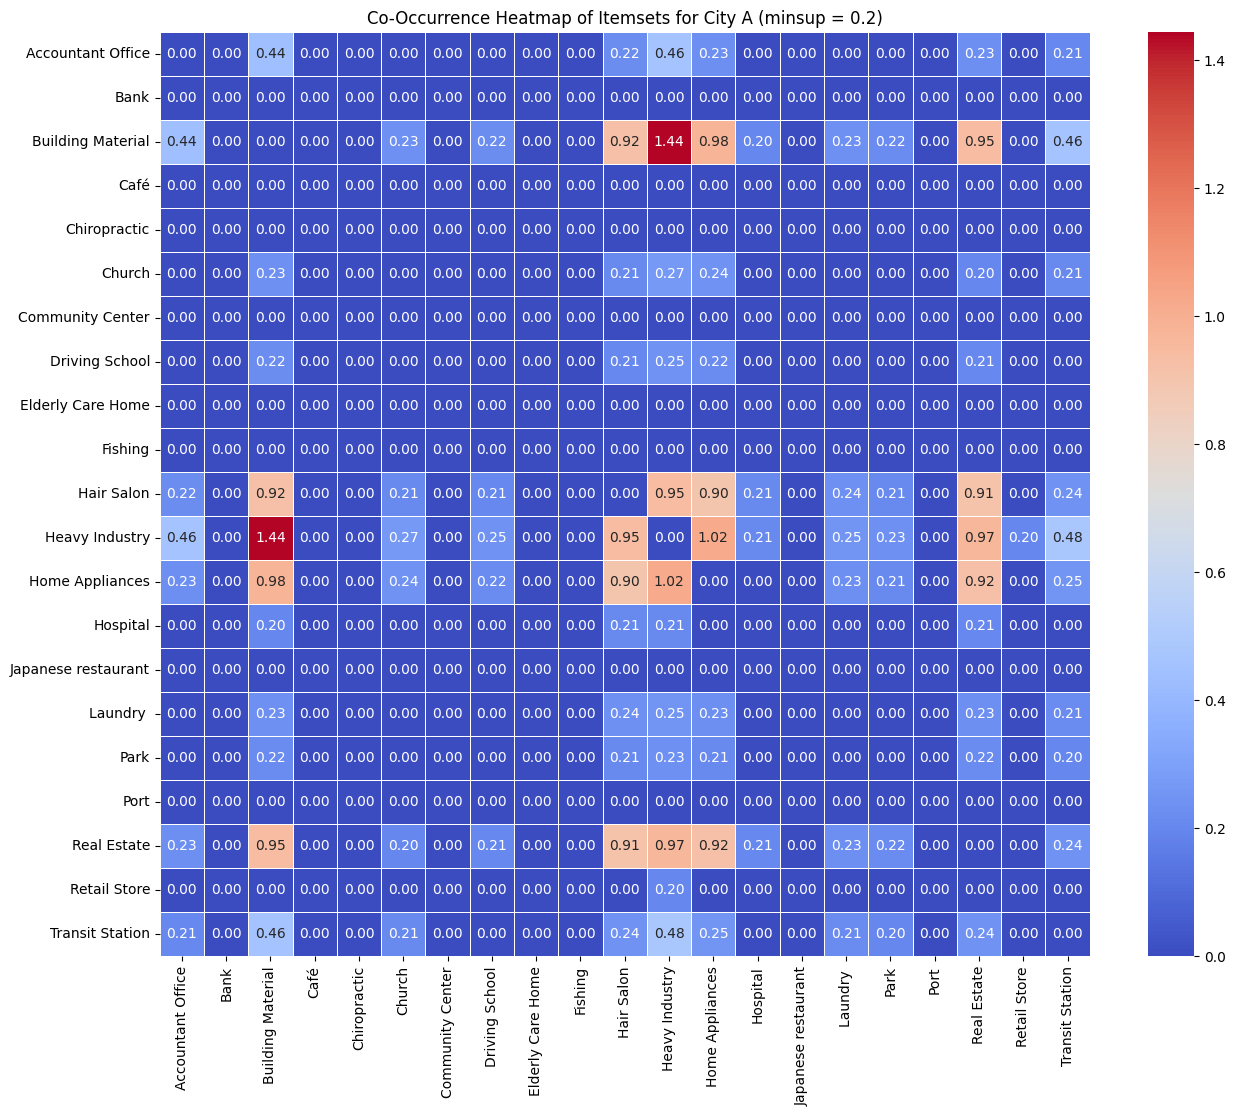

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get a list of unique items
unique_items = set()
for itemset in freqitem_A_2['itemsets']:
    unique_items.update(itemset)
unique_items = sorted(unique_items)

# Step 2: Initialize an empty co-occurrence matrix
co_occurrence_matrix = pd.DataFrame(0, index=unique_items, columns=unique_items, dtype=float)

# Step 3: Populate the co-occurrence matrix
for _, row in freqitem_A_2.iterrows():
    support = row['support']
    itemset = list(row['itemsets']) #need to convert to list because initially was a frozenset when applied apriori algorithm
    for i in range(len(itemset)):
        for j in range(i+1, len(itemset)):  # Fill both (i, j) and (j, i) for symmetry
            item1 = itemset[i]
            item2 = itemset[j]
            co_occurrence_matrix.loc[item1, item2] += support
            co_occurrence_matrix.loc[item2, item1] += support

# Step 4: Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(co_occurrence_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Co-Occurrence Heatmap of Itemsets for City A (minsup = 0.2)')
plt.show()

In [15]:
#For City B
freqitem_B_2 = apriori(basket_df_B, min_support=0.2, use_colnames=True, max_len=85, verbose=0, low_memory=False)
freqitem_B_3 = apriori(basket_df_B, min_support=0.3, use_colnames=True, max_len=85, verbose=0, low_memory=False)
freqitem_B_4 = apriori(basket_df_B, min_support=0.4, use_colnames=True, max_len=85, verbose=0, low_memory=False)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [16]:
print("The frequent itemsets with min support 0.2 are:")
print(freqitem_B_2)
print()

print("The frequent itemsets with min support 0.3 are:")
print(freqitem_B_3)
print()

print("The frequent itemsets with min support 0.4 are:")
print(freqitem_B_4)

The frequent itemsets with min support 0.2 are:
    support             itemsets
0  0.201666  (Accountant Office)
1  0.270934  (Building Material)
2  0.375055             (Church)
3  0.253836   (Community Center)
4  0.303924     (Heavy Industry)
5  0.269838    (Home Appliances)
6  0.359711    (Transit Station)

The frequent itemsets with min support 0.3 are:
    support           itemsets
0  0.375055           (Church)
1  0.303924   (Heavy Industry)
2  0.359711  (Transit Station)

The frequent itemsets with min support 0.4 are:
Empty DataFrame
Columns: [support, itemsets]
Index: []


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


The frequent itemsets with min support 0.1 are:
     support                                           itemsets
0   0.201666                                (Accountant Office)
1   0.133056                                             (Bank)
2   0.270934                                (Building Material)
3   0.375055                                           (Church)
4   0.253836                                 (Community Center)
..       ...                                                ...
66  0.100395   (Transit Station, Hair Salon, Building Material)
67  0.107628  (Home Appliances, Building Material, Heavy Ind...
68  0.108176  (Transit Station, Building Material, Heavy Ind...
69  0.110259  (Home Appliances, Transit Station, Building Ma...
70  0.103354  (Home Appliances, Transit Station, Heavy Indus...

[71 rows x 2 columns]


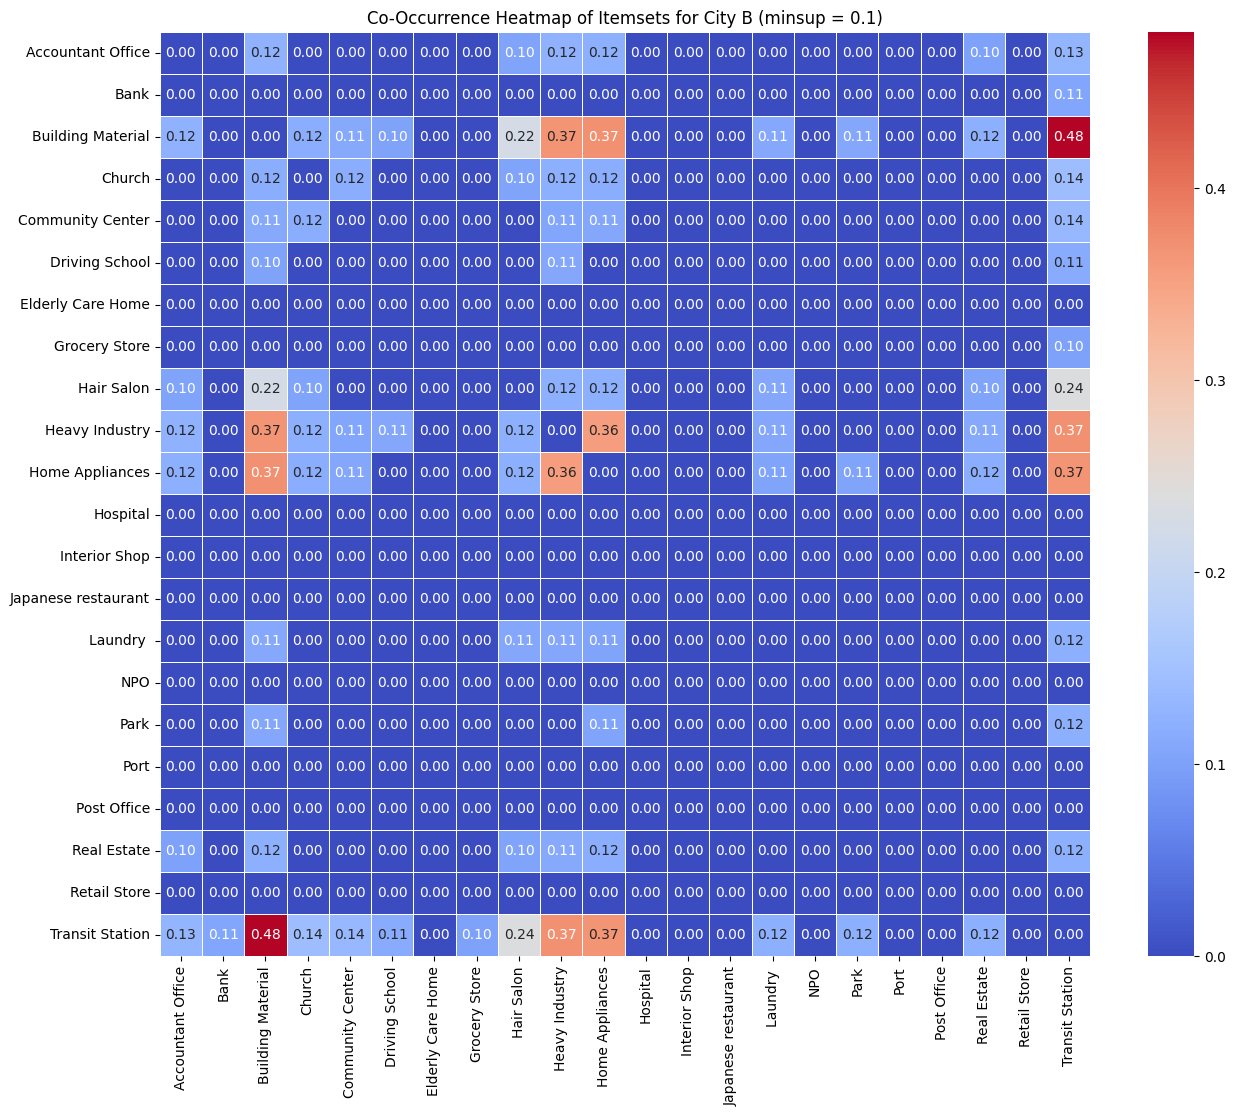

In [17]:
#no frequent pairs above so what about minsup = 0.1?
freqitem_B_1 = apriori(basket_df_B, min_support=0.1, use_colnames=True, max_len=85, verbose=0, low_memory=False)

print("The frequent itemsets with min support 0.1 are:")
print(freqitem_B_1)

# Step 1: Get a list of unique items
unique_items = set()
for itemset in freqitem_B_1['itemsets']:
    unique_items.update(itemset)
unique_items = sorted(unique_items)

# Step 2: Initialize an empty co-occurrence matrix
co_occurrence_matrix = pd.DataFrame(0, index=unique_items, columns=unique_items, dtype=float)

# Step 3: Populate the co-occurrence matrix
for _, row in freqitem_B_1.iterrows():
    support = row['support']
    itemset = list(row['itemsets']) #need to convert to list because initially was a frozenset when applied apriori algorithm
    for i in range(len(itemset)):
        for j in range(i+1, len(itemset)):  # Fill both (i, j) and (j, i) for symmetry
            item1 = itemset[i]
            item2 = itemset[j]
            co_occurrence_matrix.loc[item1, item2] += support
            co_occurrence_matrix.loc[item2, item1] += support

# Step 4: Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(co_occurrence_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Co-Occurrence Heatmap of Itemsets for City B (minsup = 0.1)')
plt.show()

In [18]:
#For City C
freqitem_C_2 = apriori(basket_df_C, min_support=0.2, use_colnames=True, max_len=85, verbose=0, low_memory=False)
freqitem_C_3 = apriori(basket_df_C, min_support=0.3, use_colnames=True, max_len=85, verbose=0, low_memory=False)
freqitem_C_4 = apriori(basket_df_C, min_support=0.4, use_colnames=True, max_len=85, verbose=0, low_memory=False)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [19]:
print("The frequent itemsets with min support 0.2 are:")
print(freqitem_C_2)
print()

print("The frequent itemsets with min support 0.3 are:")
print(freqitem_C_3)
print()

print("The frequent itemsets with min support 0.4 are:")
print(freqitem_C_4)

The frequent itemsets with min support 0.2 are:
      support                                           itemsets
0    0.385727                                (Accountant Office)
1    0.301138                                             (Bank)
2    0.472778                                (Building Material)
3    0.225161                                     (Chiropractic)
4    0.252845                                           (Church)
..        ...                                                ...
315  0.218394     (Transit Station, Hospital, Real Estate, Park)
316  0.215011     (Laundry , Transit Station, Real Estate, Park)
317  0.203937  (Building Material, Real Estate, Transit Stati...
318  0.208551  (Building Material, Real Estate, Transit Stati...
319  0.209782  (Building Material, Home Appliances, Real Esta...

[320 rows x 2 columns]

The frequent itemsets with min support 0.3 are:
     support                              itemsets
0   0.385727                   (Accountant Offic

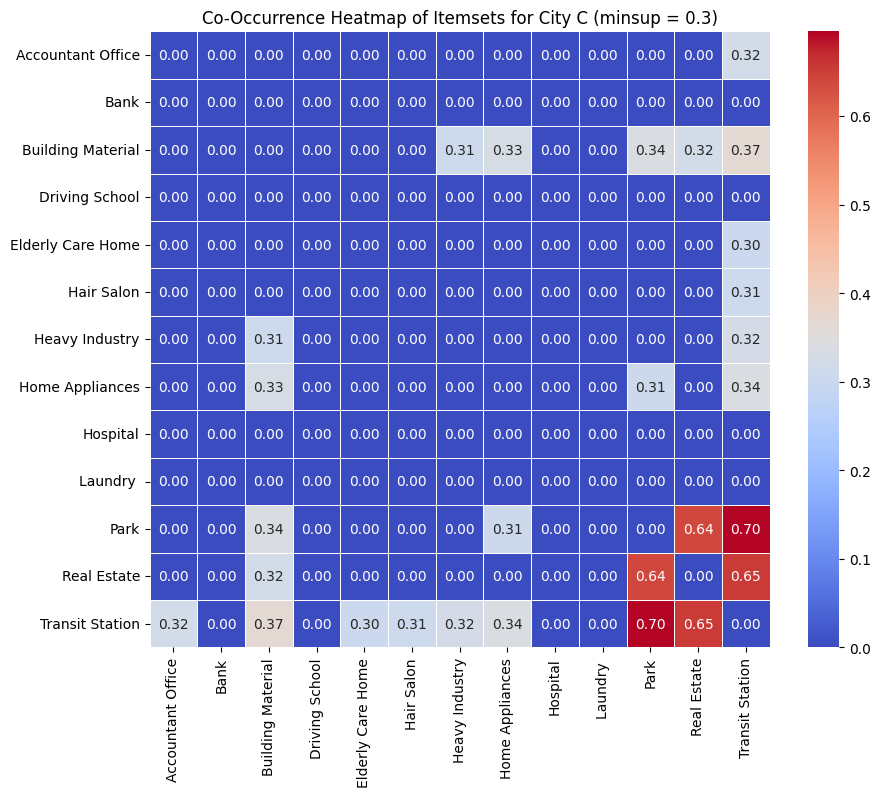

In [20]:
#For minsupport = 0.3


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get a list of unique items
unique_items = set()
for itemset in freqitem_C_3['itemsets']:
    unique_items.update(itemset)
unique_items = sorted(unique_items)

# Step 2: Initialize an empty co-occurrence matrix
co_occurrence_matrix = pd.DataFrame(0, index=unique_items, columns=unique_items, dtype=float)

# Step 3: Populate the co-occurrence matrix
for _, row in freqitem_C_3.iterrows():
    support = row['support']
    itemset = list(row['itemsets']) #need to convert to list because initially was a frozenset when applied apriori algorithm
    for i in range(len(itemset)):
        for j in range(i+1, len(itemset)):  # Fill both (i, j) and (j, i) for symmetry
            item1 = itemset[i]
            item2 = itemset[j]
            co_occurrence_matrix.loc[item1, item2] += support
            co_occurrence_matrix.loc[item2, item1] += support

# Step 4: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Co-Occurrence Heatmap of Itemsets for City C (minsup = 0.3)')
plt.show()


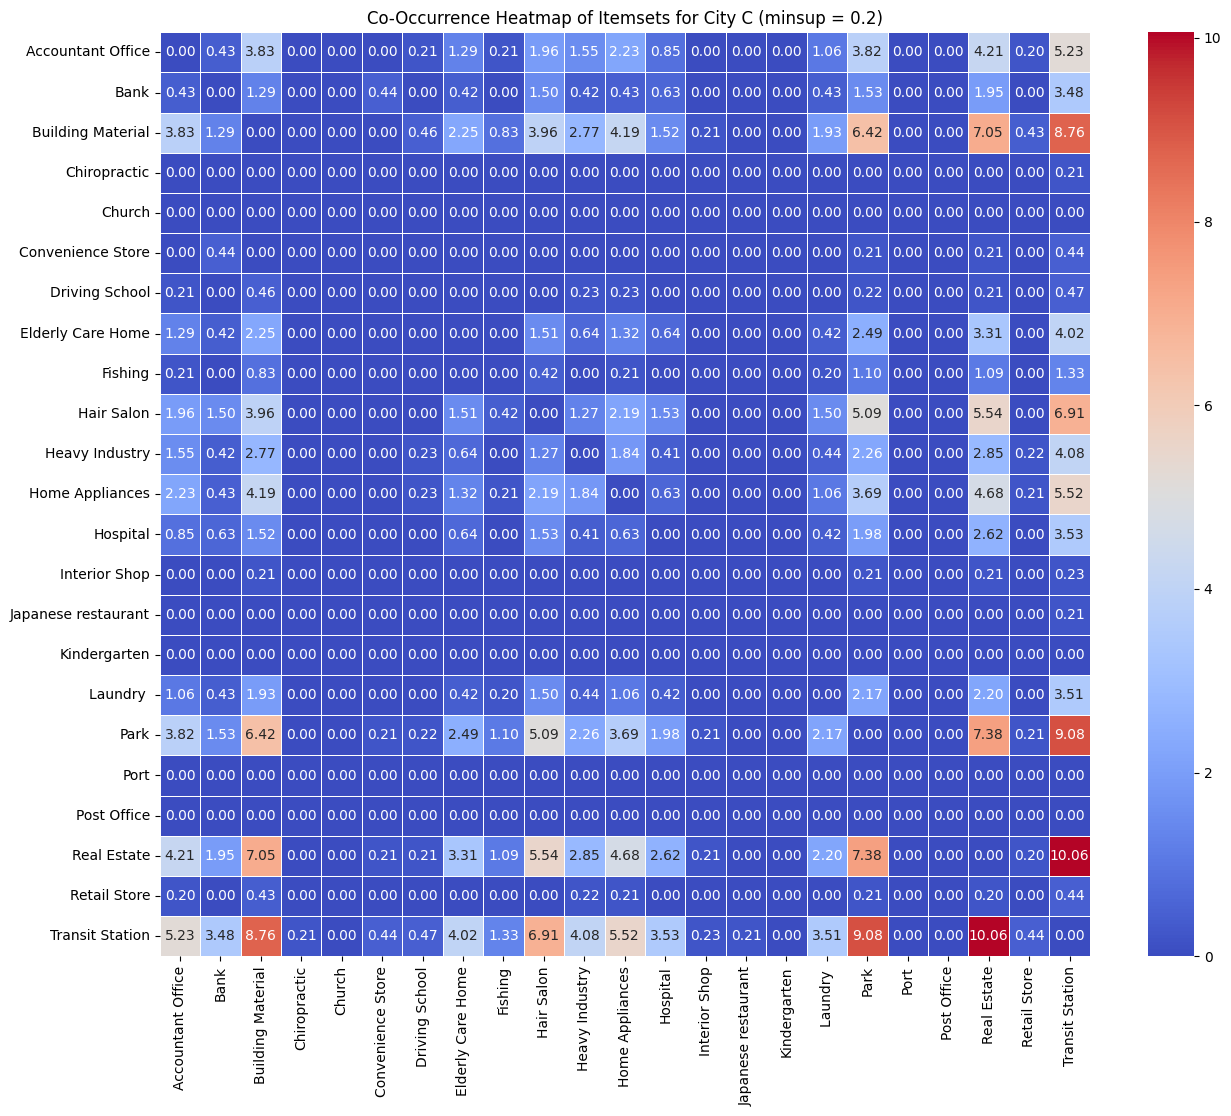

In [21]:
#For minsupport = 0.2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get a list of unique items
unique_items = set()
for itemset in freqitem_C_2['itemsets']:
    unique_items.update(itemset)
unique_items = sorted(unique_items)

# Step 2: Initialize an empty co-occurrence matrix
co_occurrence_matrix = pd.DataFrame(0, index=unique_items, columns=unique_items, dtype=float)

# Step 3: Populate the co-occurrence matrix
for _, row in freqitem_C_2.iterrows():
    support = row['support']
    itemset = list(row['itemsets']) #need to convert to list because initially was a frozenset when applied apriori algorithm
    for i in range(len(itemset)):
        for j in range(i+1, len(itemset)):  # Fill both (i, j) and (j, i) for symmetry
            item1 = itemset[i]
            item2 = itemset[j]
            co_occurrence_matrix.loc[item1, item2] += support
            co_occurrence_matrix.loc[item2, item1] += support

# Step 4: Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(co_occurrence_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Co-Occurrence Heatmap of Itemsets for City C (minsup = 0.2)')
plt.show()

In [22]:
#For City D
freqitem_D_1 = apriori(basket_df_D, min_support=0.1, use_colnames=True, max_len=85, verbose=0, low_memory=False)
freqitem_D_2 = apriori(basket_df_D, min_support=0.2, use_colnames=True, max_len=85, verbose=0, low_memory=False)
freqitem_D_3 = apriori(basket_df_D, min_support=0.3, use_colnames=True, max_len=85, verbose=0, low_memory=False)
freqitem_D_4 = apriori(basket_df_D, min_support=0.4, use_colnames=True, max_len=85, verbose=0, low_memory=False)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Library/Frameworks/Python.f

In [23]:
print("The frequent itemsets with min support 0.1 are:")
print(freqitem_D_1)
print()

print("The frequent itemsets with min support 0.2 are:")
print(freqitem_D_2)

The frequent itemsets with min support 0.1 are:
     support                                           itemsets
0   0.215599                                (Accountant Office)
1   0.143247                                             (Bank)
2   0.322625                                (Building Material)
3   0.111849                                     (Chiropractic)
4   0.360939                                           (Church)
..       ...                                                ...
82  0.110484                     (Transit Station, Real Estate)
83  0.102111    (Hair Salon, Building Material, Heavy Industry)
84  0.101656   (Transit Station, Hair Salon, Building Material)
85  0.111303  (Home Appliances, Building Material, Heavy Ind...
86  0.104933  (Transit Station, Building Material, Heavy Ind...

[87 rows x 2 columns]

The frequent itemsets with min support 0.2 are:
    support             itemsets
0  0.215599  (Accountant Office)
1  0.322625  (Building Material)
2  0.360939  

In [24]:
print("The frequent itemsets with min support 0.3 are:")
print(freqitem_D_3)
print() 

print("The frequent itemsets with min support 0.4 are:")
print(freqitem_D_4)

The frequent itemsets with min support 0.3 are:
    support             itemsets
0  0.322625  (Building Material)
1  0.360939             (Church)
2  0.334274     (Heavy Industry)
3  0.331361    (Home Appliances)
4  0.308063    (Transit Station)

The frequent itemsets with min support 0.4 are:
Empty DataFrame
Columns: [support, itemsets]
Index: []


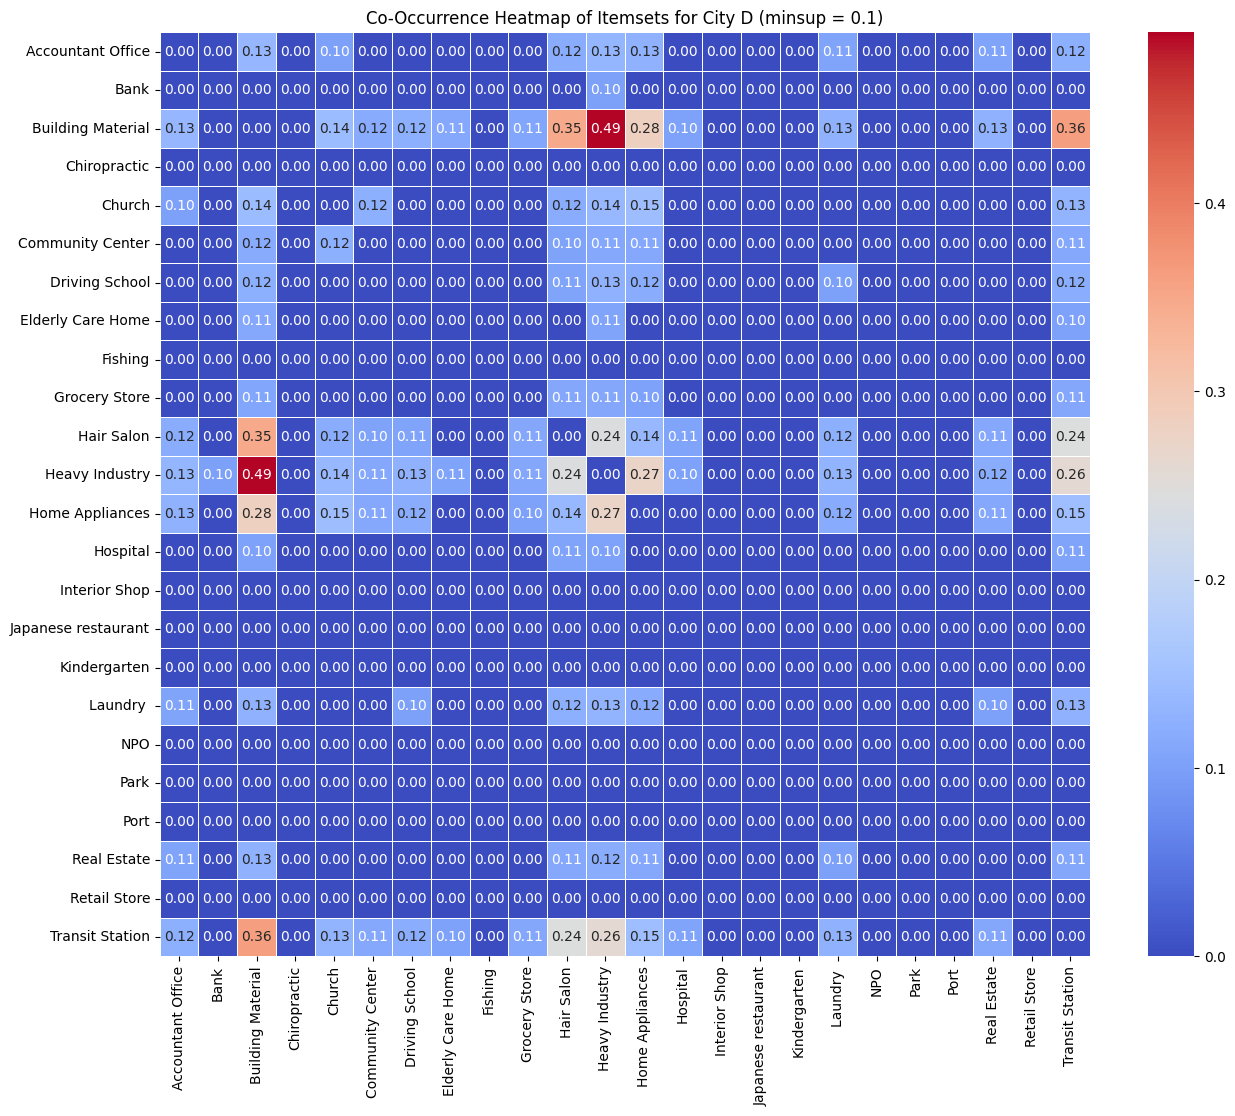

In [25]:
#only minsup = 0.1 have co-occuring itemsets so choose 0.1

# Step 1: Get a list of unique items
unique_items = set()
for itemset in freqitem_D_1['itemsets']:
    unique_items.update(itemset)
unique_items = sorted(unique_items)

# Step 2: Initialize an empty co-occurrence matrix
co_occurrence_matrix = pd.DataFrame(0, index=unique_items, columns=unique_items, dtype=float)

# Step 3: Populate the co-occurrence matrix
for _, row in freqitem_D_1.iterrows():
    support = row['support']
    itemset = list(row['itemsets']) #need to convert to list because initially was a frozenset when applied apriori algorithm
    for i in range(len(itemset)):
        for j in range(i+1, len(itemset)):  # Fill both (i, j) and (j, i) for symmetry
            item1 = itemset[i]
            item2 = itemset[j]
            co_occurrence_matrix.loc[item1, item2] += support
            co_occurrence_matrix.loc[item2, item1] += support

# Step 4: Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(co_occurrence_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Co-Occurrence Heatmap of Itemsets for City D (minsup = 0.1)')
plt.show()